In [2]:
# import python libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# read csv file

df = pd.read_csv('/content/Indian Startups - Startups1.csv')

# top 5 rows
df.head()

,Company,City,Starting Year,Founders,Industries,Description,No. of Employees,Funding Amount in $,Funding Round,No. of Investors
0,Urban Company,Gurgaon,2014,"Abhiraj Singh Bhal, Raghav Chandra, Varun Khaitan","Apps, Home Services, Marketplace, Service Indu...",Urban is a marketplace for independent contrac...,1001-5000,445920356,12,16
1,Classplus,Noida,2018,"Bhaswat Agarwal, Bikash Dash, Mukul Rustagi, N...","B2B, E-Learning, EdTech, Education, Mobile App...",Classplus is a mobile-first SaaS platform that...,101-250,89506451,10,20
2,Paytm,Noida,2010,"Akshay Khanna, Vijay Shekhar Sharma","E-Commerce, Finance, Financial Services, Inter...",Paytm is a payment gateway that allows users a...,501-1000,32448851,4,4
3,Apna,Mumbai,2019,Nirmit Parikh,"Employment, Human Resources, Recruiting, Staff...",Apna is a professional networking and job-sear...,101-250,93450000,4,6
4,Razorpay,Bengaluru,2014,"Harshil Mathur, Shashank Kumar","Financial Services, FinTech, Payments, Software","Razorpay is a payment acceptance, processing, ...",1001-5000,366600000,7,29


In [4]:
# checking datatype and null columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Company              300 non-null    object
 1   City                 300 non-null    object
 2   Starting Year        300 non-null    int64 
 3   Founders             300 non-null    object
 4   Industries           300 non-null    object
 5   Description          300 non-null    object
 6   No. of Employees     300 non-null    object
 7   Funding Amount in $  300 non-null    int64 
 8   Funding Round        300 non-null    int64 
 9   No. of Investors     300 non-null    int64 
dtypes: int64(4), object(6)
memory usage: 23.6+ KB


In [5]:
# checking null values

df.isna().sum()

,0
Company,0
City,0
Starting Year,0
Founders,0
Industries,0
Description,0
No. of Employees,0
Funding Amount in $,0
Funding Round,0
No. of Investors,0


1. Are there any outliers in the "No. of Investors" column? How might these outliers impact the analysis of investor interest in different sectors?

In [6]:
df.describe()

,Starting Year,Funding Amount in $,Funding Round,No. of Investors
count,300.000000,3.000000e+02,300.000000,300.000000
mean,2013.393333,3.148655e+08,5.986667,10.550000
std,5.139390,1.628802e+09,4.239465,7.530151
min,1984.000000,0.000000e+00,0.000000,0.000000
25%,2012.000000,1.428738e+07,3.000000,5.000000
50%,2015.000000,4.108773e+07,5.000000,9.000000
75%,2016.000000,1.319438e+08,7.000000,14.000000
max,2020.000000,2.476762e+10,25.000000,45.000000


In [7]:
df['No. of Investors'].describe()

,No. of Investors
count,300.000000
mean,10.550000
std,7.530151
min,0.000000
25%,5.000000
50%,9.000000
75%,14.000000
max,45.000000


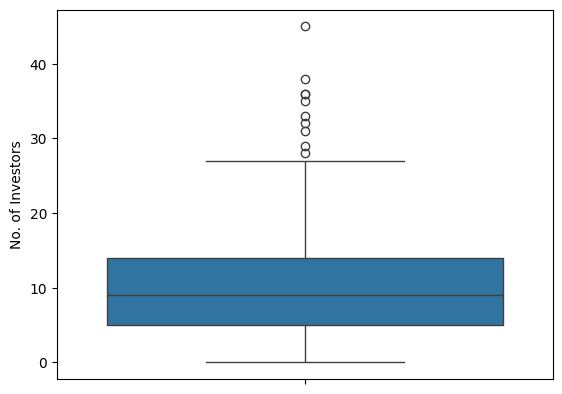

In [8]:
sns.boxplot(df['No. of Investors'])
plt.show()

Insights : There is an outlier in No. of Investor column. We can handle with IQR

2. Are there any missing values in critical columns like 'Company', 'City', 'Starting Year', or 'Founders'? How should these be handled?

In [9]:
df[['Company','City','Starting Year']].isna().sum()

,0
Company,0
City,0
Starting Year,0


No, there is no any null values in those columns, if there would be any null values then we can handle with fillna() and dropna() columns.

3.Are there any outliers in the "Funding Amount in $" column? How can these outliers be identified and potentially handled?

In [10]:
df['Funding Amount in $'].describe()

,Funding Amount in $
count,3.000000e+02
mean,3.148655e+08
std,1.628802e+09
min,0.000000e+00
25%,1.428738e+07
50%,4.108773e+07
75%,1.319438e+08
max,2.476762e+10


<Axes: ylabel='Funding Amount in $'>

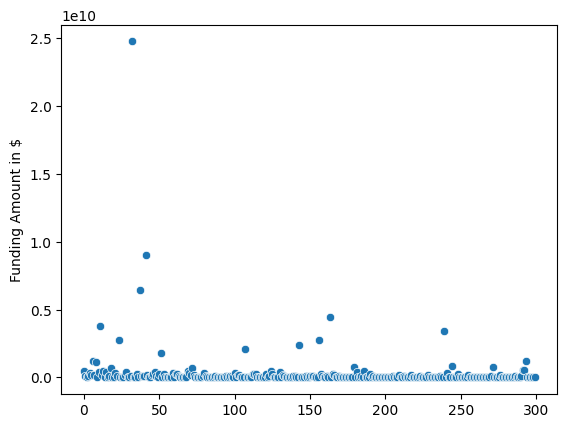

In [11]:
sns.scatterplot(df['Funding Amount in $'])


In [12]:
q1 = df['Funding Amount in $'].quantile(0.25)
q3 = df['Funding Amount in $'].quantile(0.75)
IQR = q3 - q1
IQR


117656433.25

We can handle that outlier with IQR or z score

4. Are there any opportunities to aggregate the data for better insights, such as summing funding amounts by city or industry?

In [13]:
grp_city_wise = df.groupby('City')['Funding Amount in $'].sum().reset_index()
grp_city_wise

,City,Funding Amount in $
0,Ahmedabad,515970642
1,Andheri,11294388
2,Azadpur,7420000
3,Bengaluru,26207212825
4,Chennai,849120965
5,Delhi,24569257
6,Faridabad,638829632
7,Gurgaon,15827429512
8,Haryana,184794682
9,Hyderabad,557189029


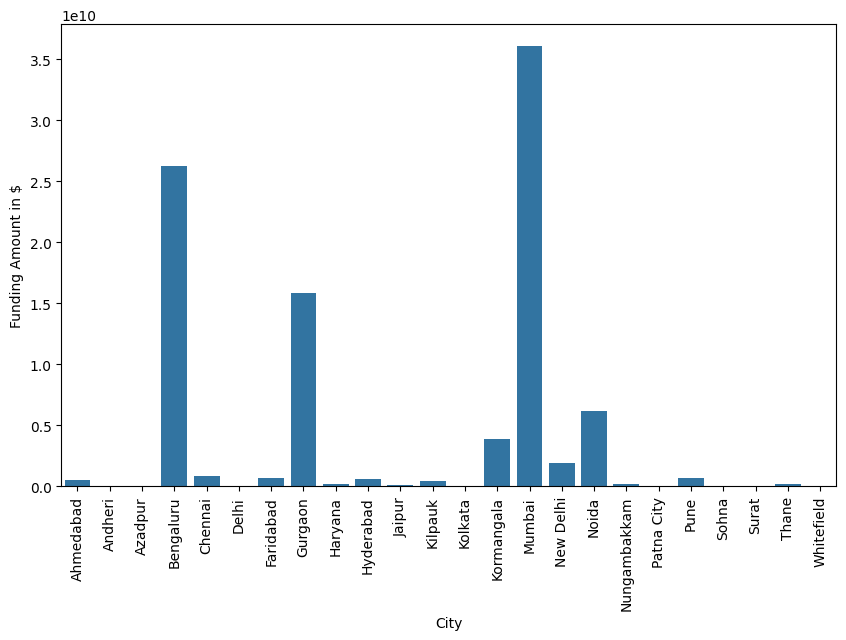

In [14]:
plt.figure(figsize=(10,6))
sns.barplot(data=grp_city_wise,x='City',y='Funding Amount in $')
plt.xticks(rotation=90)
plt.show()

5. Are there any duplicate entries in the dataset? If so, how should they be handled?

In [15]:
duplicate_value = df.duplicated()

In [16]:
df.drop_duplicates()

,Company,City,Starting Year,Founders,Industries,Description,No. of Employees,Funding Amount in $,Funding Round,No. of Investors
0,Urban Company,Gurgaon,2014,"Abhiraj Singh Bhal, Raghav Chandra, Varun Khaitan","Apps, Home Services, Marketplace, Service Indu...",Urban is a marketplace for independent contrac...,1001-5000,445920356,12,16
1,Classplus,Noida,2018,"Bhaswat Agarwal, Bikash Dash, Mukul Rustagi, N...","B2B, E-Learning, EdTech, Education, Mobile App...",Classplus is a mobile-first SaaS platform that...,101-250,89506451,10,20
2,Paytm,Noida,2010,"Akshay Khanna, Vijay Shekhar Sharma","E-Commerce, Finance, Financial Services, Inter...",Paytm is a payment gateway that allows users a...,501-1000,32448851,4,4
3,Apna,Mumbai,2019,Nirmit Parikh,"Employment, Human Resources, Recruiting, Staff...",Apna is a professional networking and job-sear...,101-250,93450000,4,6
4,Razorpay,Bengaluru,2014,"Harshil Mathur, Shashank Kumar","Financial Services, FinTech, Payments, Software","Razorpay is a payment acceptance, processing, ...",1001-5000,366600000,7,29
...,...,...,...,...,...,...,...,...,...,...
295,SafexPay,Thane,2017,Ravi Gupta,"FinTech, Payments",Safexpay is a B2B2B finance company that speci...,51-100,5280000,1,2
296,Pariksha,Pune,2015,"Deepak Choudhary, Karanvir Singh Shekhawat, Ut...","E-Learning, EdTech, Education, Skill Assessment",Pariksha - The Success App is India's leading ...,51-100,6065079,7,20
297,Fyllo,Bengaluru,2019,"Sachin Gautam, Sudhanshu Rai, Sumit Sheoran","Agriculture, AgTech, Artificial Intelligence, ...",Fyllo is a precision agriculture service provi...,11-50,557033,4,6
298,CredFlow,New Delhi,2019,Kunal Aggarwal,"Credit, Financial Services",CredFlow offers financial services that help y...,1-10,1824000,1,4


6. Are there any trends in the funding amount received by startups based on the "Starting Year"?

In [17]:
grp_starting_year = df.groupby('Starting Year')['Funding Amount in $'].sum().reset_index()
grp_starting_year

,Starting Year,Funding Amount in $
0,1984,456059601
1,1989,15000000
2,1990,21445200
3,1991,129250000
4,1995,71276176
5,1996,14100000
6,1998,423238799
7,1999,224500000
8,2000,4880324817
9,2001,742000000


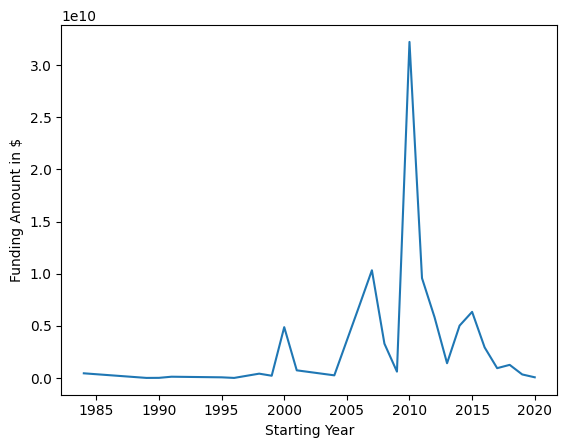

In [18]:
sns.lineplot(data=grp_starting_year,x='Starting Year',y='Funding Amount in $')
plt.show()

7. Create a line chart showing the total funding amount raised by startups each year. Highlight any significant spikes or dips in funding activity.


In [19]:
raised_amount_by_strtup = df.groupby('Starting Year')['Funding Amount in $'].sum().reset_index()
raised_amount_by_strtup

,Starting Year,Funding Amount in $
0,1984,456059601
1,1989,15000000
2,1990,21445200
3,1991,129250000
4,1995,71276176
5,1996,14100000
6,1998,423238799
7,1999,224500000
8,2000,4880324817
9,2001,742000000


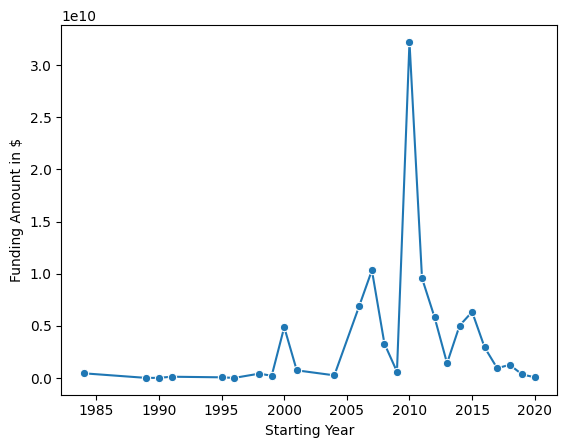

In [20]:
sns.lineplot(data = raised_amount_by_strtup,x='Starting Year',y= 'Funding Amount in $',marker='o')
plt.show()

8.Generate a bar chart showing the number of startups in each industry category. Label the top 5 industries with the highest number of startups.

In [21]:
top_5_industries = df['Industries'].str.split(',').explode().value_counts().head().reset_index()
top_5_industries

,Industries,count
0,Internet,52
1,FinTech,48
2,Financial Services,42
3,E-Commerce,40
4,Software,38


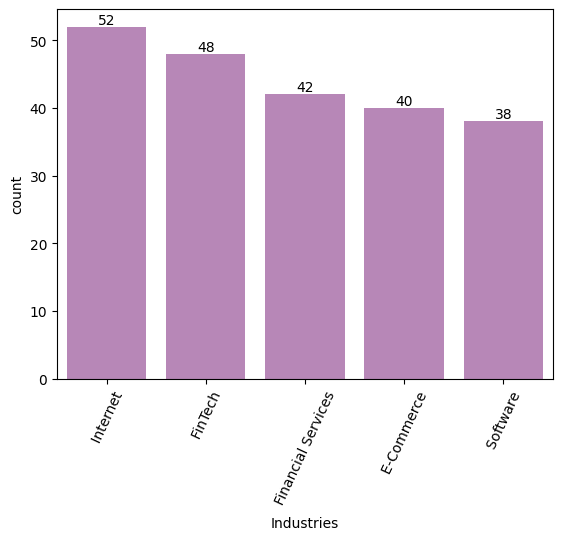

In [22]:
xz = sns.barplot(data=top_5_industries,x='Industries',y='count',color='purple',alpha=0.5)
plt.xticks(rotation=65)
for i in xz.containers:
  xz.bar_label(i)
plt.show()

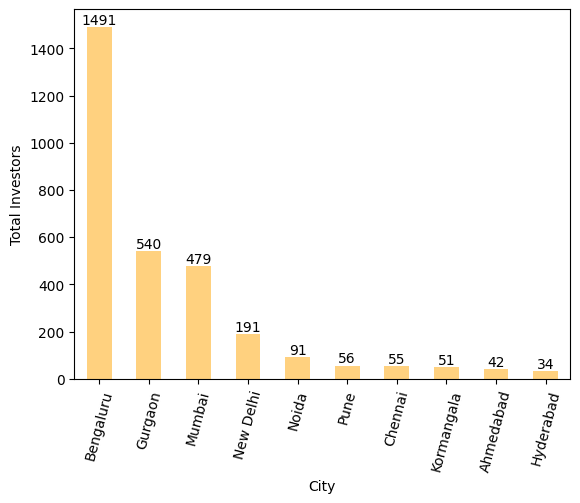

In [31]:
xz = df.groupby('City')['No. of Investors'].sum().sort_values(ascending=False).head(10).plot(kind='bar',color='orange',alpha=0.5)
plt.ylabel('Total Investors')
plt.xlabel('City')
for i in xz.containers:
  xz.bar_label(i)
plt.xticks(rotation=75)
plt.show()

In [37]:
top_10_year = df.groupby('Starting Year')['No. of Investors'].sum().sort_values(ascending=False).reset_index().head(10)
top_10_year

,Starting Year,No. of Investors
0,2015,761
1,2012,270
2,2014,264
3,2016,260
4,2011,246
5,2017,241
6,2019,208
7,2018,170
8,2010,170
9,2013,149


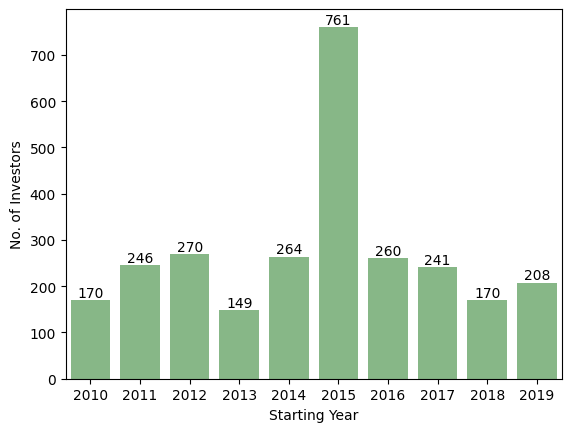

In [49]:
xz = sns.barplot(data=top_10_year,x='Starting Year',y='No. of Investors',color='green',alpha=0.5)
for i in xz.containers:
  xz.bar_label(i)
plt.show()

# Conclusion

When working with the data from Indian Start_up, we have uncovered fascinating insights that shed light on the past performanace and offer guidance for future analysis

As per my analysis Mumbai raised highest funding amount in startup followed by Banglore.

Here are trend's  where some startups got good funding in year between 2010 & 2015.

Internet is fastest growing industry followed by fintech industry.

Bengluru city is having large no. of Investor but concerning is Noida despite being in touch with capital is still low no. of investor.

Year 2015 is like offer for investors, because insights were too high in that year.